# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs 
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=28dd5bd9fdcd0365d2a88aabf63d3125&units=imperial&q=


In [4]:
# Create lists to store data for dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | shwebo
City not found. Skipping...
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | buala
Processing Record 7 of Set 1 | viedma
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | banda aceh
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | alamosa
City not found. Skipping...
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | udachnyy
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 

Processing Record 33 of Set 4 | golden
Processing Record 34 of Set 4 | tromso
Processing Record 35 of Set 4 | port elizabeth
Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | alice springs
Processing Record 38 of Set 4 | tuatapere
City not found. Skipping...
Processing Record 39 of Set 4 | labuhan
Processing Record 40 of Set 4 | houma
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | misratah
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | aykhal
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | merzifon
Processing Record 48 of Set 4 | sapouy
Processing Record 49 of Set 4 | ilulissat
City not found. Skipping...
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | itarare
Processing Record 3 of Set 5 | zeya
City not found. Skipping...
Processing Record 4 of Set 5 | inverell
Processing Record 5 of Set 5 | turukhansk
Processing Record 6 of S

Processing Record 19 of Set 8 | acapulco
Processing Record 20 of Set 8 | yanam
Processing Record 21 of Set 8 | hailey
Processing Record 22 of Set 8 | loviisa
Processing Record 23 of Set 8 | oktyabrskoye
Processing Record 24 of Set 8 | outlook
Processing Record 25 of Set 8 | atambua
Processing Record 26 of Set 8 | tamandare
Processing Record 27 of Set 8 | grand centre
Processing Record 28 of Set 8 | zhireken
Processing Record 29 of Set 8 | nuuk
City not found. Skipping...
Processing Record 30 of Set 8 | lugovoy
Processing Record 31 of Set 8 | kulu
Processing Record 32 of Set 8 | hervey bay
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | antigonish
Processing Record 36 of Set 8 | santa cruz
Processing Record 37 of Set 8 | vila velha
City not found. Skipping...
Processing Record 38 of Set 8 | skjervoy
Processing Record 39 of Set 8 | stornoway
Processing Record 40 of Set 8 | kangaatsiaq
Processing Record 41 of Set 8 | manjacaze


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dataframe
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [20]:
weather_df = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,100,AU,1604280448,86,-33.65,115.33,62.01,5.91
1,shwebo,52,MM,1604280971,87,22.57,95.70,78.26,5.28
2,barrow,75,US,1604280657,68,71.29,-156.79,28.40,18.34
3,qaanaaq,0,GL,1604280449,74,77.48,-69.36,2.79,6.44
4,thompson,75,CA,1604280467,100,55.74,-97.86,21.20,3.36
5,buala,42,SB,1604280720,64,-8.14,159.59,87.46,2.98
6,viedma,0,AR,1604280725,52,-40.81,-63.00,64.00,16.62
7,chokurdakh,100,RU,1604280466,93,70.63,147.92,-0.53,11.34
8,camacha,20,PT,1604280714,88,33.08,-16.33,66.20,3.69
9,portland,1,US,1604280452,41,45.52,-122.68,61.00,8.05


In [25]:
# Export dataframe to csv
# weather_df.to_csv("C:/Users/15038/Desktop/Bootcamp HW/python-api-challenge/WeatherPy/Output/weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
clean_weather_df = weather_df.loc[weather_df["Humidity"] > 100]
clean_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# No cities with humidity > 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

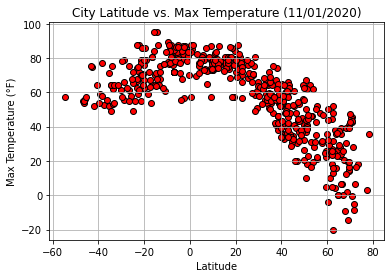

In [8]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="red", marker="o", edgecolor="black")

# Format the graph labels
plt.title("City Latitude vs. Max Temperature (11/01/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

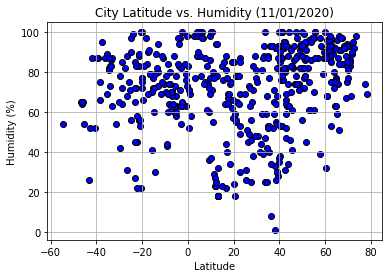

In [9]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="blue", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Humidity (11/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

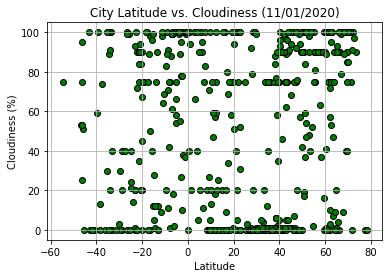

In [10]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="green", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Cloudiness (11/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

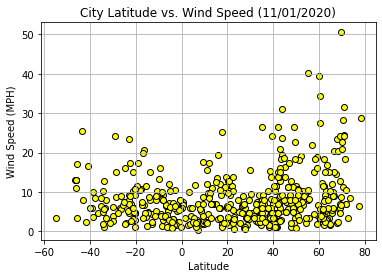

In [11]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Wind Speed (11/01/2020)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

# Relationship between Latitidue and Wind Speed
#### As the plot shows, there is little correlation between latitude and wind speed. As latitude increases, wind speed does not increase proportionally. 

## Linear Regression

In [13]:
# Create dataframes for northern and southern cities
nothern = weather_df.loc[weather_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [14]:
# Define regression plot

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8548887940298991


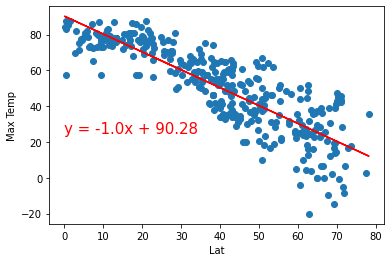

In [15]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6280857293193013


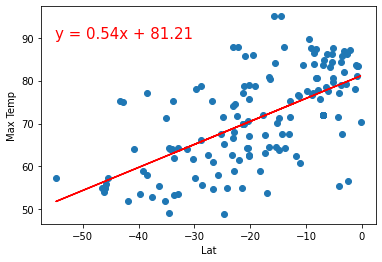

In [16]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34635863861617966


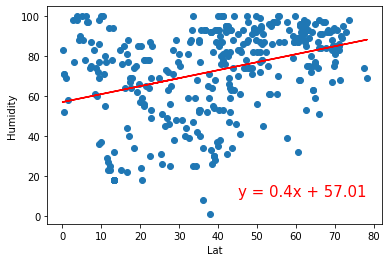

In [33]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09785510384397858


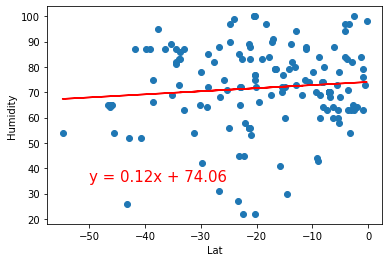

In [39]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-50,35)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24925729149692233


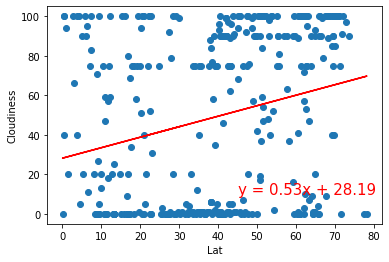

In [31]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3140471789598146


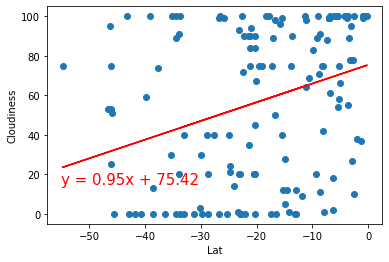

In [34]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.29069576492798876


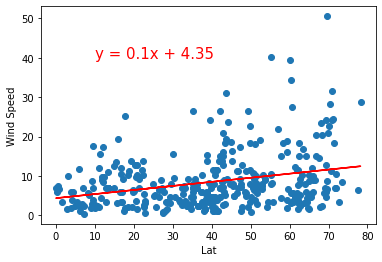

In [38]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (10,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2915262835298259


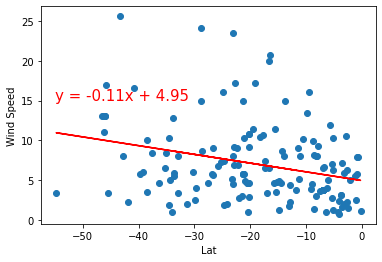

In [36]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)